<a href="https://colab.research.google.com/github/Kumar-230/Sentiment_analysis/blob/main/SentimentT2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install transformers

     |████████████████████████████████| 2.3MB 21.9MB/s 
     |████████████████████████████████| 3.3MB 49.8MB/s 
     |████████████████████████████████| 901kB 27.6MB/s 


In [ ]:
from transformers import BertTokenizer, TFBertForSequenceClassification
from transformers import InputExample, InputFeatures

model = TFBertForSequenceClassification.from_pretrained("bert-base-uncased")
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")

All model checkpoint layers were used when initializing TFBertForSequenceClassification.

Some layers of TFBertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
pip install unidecode

     |████████████████████████████████| 245kB 3.7MB/s 


In [ ]:
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
import io
import unicodedata
import numpy as np
import re
import string


In [ ]:
from numpy import linalg
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.tokenize import PunktSentenceTokenizer
from nltk.tokenize import PunktSentenceTokenizer
from nltk.corpus import webtext
from nltk.stem.porter import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

/usr/local/lib/python3.7/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")


Mounted at /content/gdrive


In [ ]:
df=pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/Data Analyst - Test Data - US_VaderScoresU3.csv')

In [ ]:
dfn=pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/Data Analyst - Test Data - US_VaderScoresU5.csv')

In [ ]:
dfinal=dfn
dfn.head()

,Unnamed: 0,date,Location,Review,Language,nb_chars,nb_words,Review_clean,neg,neu,pos,compound,NegRating,NeuRating,PosRating,Unnamed: 15
0,0,8/20/19,Sebastian,I was very impressed with the resort.\n Great ...,en,169,29,impressed resort.\n great staff main resort po...,0.000,0.462,0.538,0.9325,0,0,1,Positive
1,1,8/20/19,Los Angeles,The rooms were nice the outside needs work als...,en,107,21,room nice outside need work also free breakfas...,0.000,0.419,0.581,0.8779,0,0,1,Positive
2,2,8/20/19,Georgia,Great location! I have stayed at this hotel on...,en,79,16,great location stay hotel last three trip new ...,0.000,0.661,0.339,0.6249,0,1,0,Positive
3,3,8/20/19,NaN,The hotel was adequate for my stay. The strips...,en,420,80,hotel adequate stay strip bathtub useless fell...,0.124,0.716,0.160,0.1779,0,1,0,Negative
4,4,8/19/19,Palm Harbor,"Great location, room was large and spacious. P...",en,99,16,great location room large spacious park easy a...,0.000,0.317,0.683,0.9169,0,0,1,Positive


In [ ]:
df.head()

,Unnamed: 0,date,Location,Review,Language,nb_chars,nb_words,Review_clean,neg,neu,pos,compound,NegRating,NeuRating,PosRating
0,0,8/20/19,Sebastian,I was very impressed with the resort.\n Great ...,en,169,29,impressed resort.\n great staff main resort po...,0.000,0.462,0.538,0.9325,0,0,1
1,1,8/20/19,Los Angeles,The rooms were nice the outside needs work als...,en,107,21,room nice outside need work also free breakfas...,0.000,0.419,0.581,0.8779,0,0,1
2,2,8/20/19,Georgia,Great location! I have stayed at this hotel on...,en,79,16,great location stay hotel last three trip new ...,0.000,0.661,0.339,0.6249,0,1,0
3,3,8/20/19,NaN,The hotel was adequate for my stay. The strips...,en,420,80,hotel adequate stay strip bathtub useless fell...,0.124,0.716,0.160,0.1779,0,1,0
4,4,8/19/19,Palm Harbor,"Great location, room was large and spacious. P...",en,99,16,great location room large spacious park easy a...,0.000,0.317,0.683,0.9169,0,0,1


In [ ]:
import re
from re import sub
import multiprocessing
from unidecode import unidecode

from gensim.models.phrases import Phrases, Phraser
from gensim.models import Word2Vec
from gensim.test.utils import get_tmpfile
from gensim.models import KeyedVectors


from time import time
from collections import defaultdict

import logging  # Setting up the loggings to monitor gensim
logging.basicConfig(format="%(levelname)s - %(asctime)s: %(message)s", datefmt= '%H:%M:%S', level=logging.INFO)

In [ ]:
df2=df
df2

,date,Location,Review,Language,nb_chars,nb_words
0,8/20/19,Sebastian,I was very impressed with the resort.\n Great ...,en,169,29
1,8/20/19,Los Angeles,The rooms were nice the outside needs work als...,en,107,21
2,8/20/19,Georgia,Great location! I have stayed at this hotel on...,en,79,16
3,8/20/19,NaN,The hotel was adequate for my stay. The strips...,en,420,80
4,8/19/19,Palm Harbor,"Great location, room was large and spacious. P...",en,99,16
...,...,...,...,...,...,...
5772,7/12/19,United States of America,"·the staff were all so friendly. frank, the ch...",en,682,136
5773,7/12/19,United States of America,·the internet barely worked or did not work,en,42,7
5774,7/10/19,United States of America,·the location was great.\n \n \n \n \n ·the be...,en,94,20
5775,7/10/19,United States of America,·we were early for check in and the staff was ...,en,130,25


In [ ]:
#del df2['Unnamed: 0']
del df2['Review_clean']
del df2['neg']
del df2['pos']
del df2['neu']
del df2['NegRating']
del df2['PosRating']
del df2['NeuRating']
del df2['compound']


In [ ]:
len(df2)

5777

In [ ]:
dfT=pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/tripadvisor_hotel_reviews.csv')
#dfT.head()
len(dfT)

20491

In [ ]:
#dfTc=dfT
dfTc["Rating"] = dfTc["Rating"].apply(lambda x: -1 if x < 3 else x)

In [ ]:
dfTc["Rating"] = dfTc["Rating"].apply(lambda x: 1 if x > 3 else x)

In [ ]:
dfTc["Rating"] = dfTc["Rating"].apply(lambda x: 0 if x == 3 else x)

In [ ]:
dfTc["Rating"].value_counts()

 1    15093
-1     3214
 0     2184
Name: Rating, dtype: int64

In [ ]:
from nltk.corpus import wordnet

def get_wordnet_pos(pos_tag):
    if pos_tag.startswith('J'):
        return wordnet.ADJ
    elif pos_tag.startswith('V'):
        return wordnet.VERB
    elif pos_tag.startswith('N'):
        return wordnet.NOUN
    elif pos_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

import string
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.tokenize import WhitespaceTokenizer
from nltk.stem import WordNetLemmatizer

def clean_text(text):
    # lower text
    text = text.lower()
    # tokenize text and remove puncutation
    text = [word.strip(string.punctuation) for word in text.split(" ")]
    # remove words that contain numbers
    text = [word for word in text if not any(c.isdigit() for c in word)]
    # remove stop words
    stop = stopwords.words('english')
    text = [x for x in text if (x not in stop or x=="not" or x=="but")]
    # remove empty tokens
    text = [t for t in text if len(t) > 0]
    # pos tag text
    pos_tags = pos_tag(text)
    # lemmatize text
    text = [WordNetLemmatizer().lemmatize(t[0], get_wordnet_pos(t[1])) for t in pos_tags]
    # remove words with only one letter
    text = [t for t in text if len(t) > 1]
    # join all
    text = " ".join(text)
    return(text)

# clean text data
#dfTc["Review_clean"] = dfTc["Review"].apply(lambda x: clean_text(x))

In [ ]:
#del df2['Review_clean']
df2["Review_clean"] = df2["Review"].apply(lambda x: clean_text(x))

In [ ]:
import nltk
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
import nltk
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [ ]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sid = SentimentIntensityAnalyzer()
#dfTc["sentiments"] = dfTc["Review_clean"].apply(lambda x: sid.polarity_scores(x))
#dfTc = pd.concat([dfTc.drop(['sentiments'], axis=1), dfTc['sentiments'].apply(pd.Series)], axis=1)

In [ ]:
del df2['neg']

In [ ]:
sid=SentimentIntensityAnalyzer()
df2["sentiments"] = df2["Review_clean"].apply(lambda x: sid.polarity_scores(x))
df2 = pd.concat([df2.drop(['sentiments'], axis=1), df2['sentiments'].apply(pd.Series)], axis=1)

In [ ]:
import nltk
nltk.download('vader_lexicon')


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [ ]:
dfTc.head()

,Review,Rating,Review_clean,neg,neu,pos,compound,nb_chars,nb_words,doc2vec_vector_0,doc2vec_vector_1,doc2vec_vector_2,doc2vec_vector_3,doc2vec_vector_4,word___ç,word_aa,word_aaa,word_ab,word_abandon,word_abc,word_ability,word_abit,word_able,word_abound,word_about,word_above,word_abroad,word_abrupt,word_absence,word_absolut,word_absolute,word_absolutely,word_absolutley,word_absolutly,word_absorb,word_absurd,word_abundance,word_abundant,word_abysmal,word_ac,...,word_yikes,word_yo,word_yoga,word_yoghurt,word_yogurt,word_york,word_yorker,word_yorkers,word_you,word_you__ç_é,word_you__ç_éèe,word_you__ç_éêl,word_you__ç_éö,word_youll,word_young,word_your,word_youre,word_yourself,word_youth,word_yr,word_yrs,word_yuan,word_yuck,word_yuk,word_yum,word_yummy,word_yunque,word_zaza,word_zealand,word_zen,word_zero,word_zip,word_zocalo,word_zona,word_zone,word_zoo,word_äcor,word_äe,word_äes,word_äs
0,nice hotel expensive parking got good deal sta...,1,nice hotel expensive parking get good deal sta...,0.056,0.617,0.327,0.9808,593,89,-0.154264,0.082530,0.202894,-0.065578,-0.057950,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,ok nothing special charge diamond member hilto...,-1,ok nothing special charge diamond member hilto...,0.063,0.687,0.250,0.9945,1689,252,0.088976,0.100807,0.489298,-1.082097,0.219414,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.062595,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,nice rooms not 4* experience hotel monaco seat...,0,nice room experience hotel monaco seattle good...,0.053,0.706,0.241,0.9925,1427,219,0.010272,0.057031,0.807238,-0.707229,-0.612106,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.075552,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,"unique, great stay, wonderful time hotel monac...",1,unique great stay wonderful time hotel monaco ...,0.044,0.558,0.398,0.9918,600,91,0.230855,0.174541,0.597464,0.066678,-0.167572,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,"great stay great stay, went seahawk game aweso...",1,great stay great stay go seahawk game awesome ...,0.099,0.641,0.261,0.9914,1281,193,-0.258044,0.368680,0.298903,-0.672101,-0.137115,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
dfTc["nb_chars"] = dfTc["Review"].apply(lambda x: len(x))
dfTc["nb_words"] = dfTc["Review"].apply(lambda x: len(x.split(" ")))

In [ ]:
df2["nb_chars"] = df2["Review"].apply(lambda x: len(x))
df2["nb_words"] = df2["Review"].apply(lambda x: len(x.split(" ")))

In [ ]:
from gensim.test.utils import common_texts
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

documents = [TaggedDocument(doc, [i]) for i, doc in enumerate(dfTc["Review_clean"].apply(lambda x: x.split(" ")))]

# train a Doc2Vec model with our text data
model = Doc2Vec(documents, vector_size=5, window=2, min_count=1, workers=4)

# transform each document into a vector data
doc2vec_df = dfTc["Review_clean"].apply(lambda x: model.infer_vector(x.split(" "))).apply(pd.Series)
doc2vec_df.columns = ["doc2vec_vector_" + str(x) for x in doc2vec_df.columns]
dfTc = pd.concat([dfTc, doc2vec_df], axis=1)

WARNING - 18:46:36: consider setting layer size to a multiple of 4 for greater performance
INFO - 18:46:36: collecting all words and their counts
INFO - 18:46:36: PROGRESS: at example #0, processed 0 words (0/s), 0 word types, 0 tags
INFO - 18:46:37: PROGRESS: at example #10000, processed 965150 words (3614080/s), 43363 word types, 10000 tags
INFO - 18:46:37: PROGRESS: at example #20000, processed 1941345 words (3061228/s), 71257 word types, 20000 tags
INFO - 18:46:37: collected 72759 word types and 20491 unique tags from a corpus of 20491 examples and 1999818 words
INFO - 18:46:37: Loading a fresh vocabulary
INFO - 18:46:37: effective_min_count=1 retains 72759 unique words (100% of original 72759, drops 0)
INFO - 18:46:37: effective_min_count=1 leaves 1999818 word corpus (100% of original 1999818, drops 0)
INFO - 18:46:37: deleting the raw counts dictionary of 72759 items
INFO - 18:46:37: sample=0.001 downsamples 48 most-common words
INFO - 18:46:37: downsampling leaves estimated 1781

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(min_df = 10)
tfidf_result = tfidf.fit_transform(dfTc["Review_clean"]).toarray()
tfidf_df = pd.DataFrame(tfidf_result, columns = tfidf.get_feature_names())
tfidf_df.columns = ["word_" + str(x) for x in tfidf_df.columns]
tfidf_df.index = dfTc.index
dfTc = pd.concat([dfTc, tfidf_df], axis=1)

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color = 'white',
        max_words = 200,
        max_font_size = 40,
        scale = 3,
        random_state = 42
    ).generate(str(data))

    fig = plt.figure(1, figsize = (20, 20))
    plt.axis('off')
    if title:
        fig.suptitle(title, fontsize = 20)
        fig.subplots_adjust(top = 2.3)

    plt.imshow(wordcloud)
    plt.show()

# print wordcloud
#show_wordcloud(dfTc["Review"])

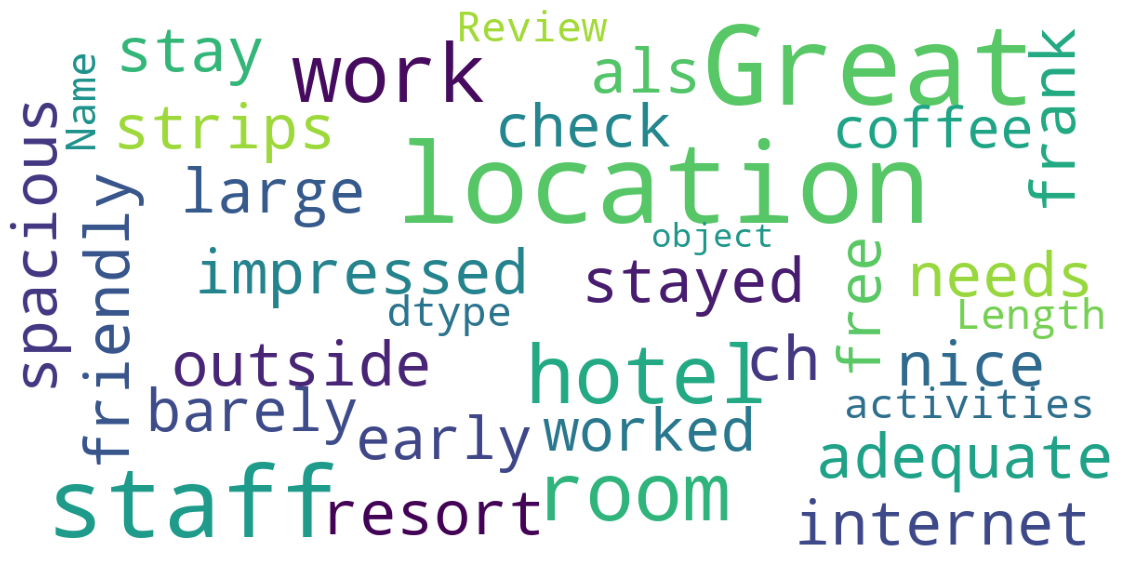

In [ ]:
show_wordcloud(df2["Review"])

In [ ]:
dfTc[dfTc["nb_words"] >= 5].sort_values("pos", ascending = False)[["Review", "pos"]].head(10)

,Review,pos
13123,"perfect, impressive place, want clean comfy ro...",0.813
4073,hotel great hotel great money clean good restu...,0.799
15066,"regular, amazing value, stay hotel let, great ...",0.794
10778,"fantastic value money good value money, great ...",0.792
7709,"great hotel loved hotel, location perfect staf...",0.790
598,"incredible value great price expedia package, ...",0.777
5175,"fabulous trip stayed just night wish longer, h...",0.776
10819,"truely fantastic hotel great hotel, staff supe...",0.765
12988,"just great, recently stayed clarendon great st...",0.764
2346,"best hotel, hotel gorgeous, beautiful clean sp...",0.763


In [ ]:
df2[df2["nb_words"] >= 5].sort_values("pos", ascending = False)[["Review", "pos", "compound"]].head(10)

,Review,pos,compound
1444,Very clean and comfortable. V v,1.000,0.7184
3101,It was very nice 👍,1.000,0.4215
2844,"Awesome, relaxing and well worth the money. Great",0.939,0.9371
796,"Good, excellent....... recommendations is perf...",0.926,0.9100
3139,Clean. Comfortable. Very helpful and Friendly ...,0.923,0.9001
173,All good! We are very happy and the joy is in ...,0.912,0.8860
2740,it was comfortable and enjoyable. staff was great,0.912,0.8834
1971,I love this hotel. Nice and clean,0.907,0.8658
209,The location is very good. It is clean and hav...,0.895,0.8176
3956,Was a great hotel with a great,0.891,0.8481


In [ ]:
#df2["NegRating"] = df2["neg"].apply(lambda x: 1 if x > 0.2 else 0)
#df2["PosRating"] = df2["pos"].apply(lambda x: 1 if x > 0.5 else 0)
#df2["NeuRating"] = df2["neu"].apply(lambda x: 1 if x > 0.4 else 0)
#del df2["NegRating"]
#del df2["PosRating"]
#del df2["NeuRating"]

df2["NegRating"] = df2["compound"].apply(lambda x:1 if x<0 else 0)
df2["NeuRating"] = df2["compound"].apply(lambda x:1 if 0<=x<=0.65 else 0)
df2["PosRating"] = df2["compound"].apply(lambda x:1 if x>0.65 else 0)


In [ ]:
UNeu=[]
UPos=[]
UNeg=[]
for i in range(len(dfinal)):
  if((dfinal["PosRating"][i]==1 and dfinal["Unnamed: 15"][i]=="Negative") or (dfinal["NegRating"][i]==1 and dfinal["Unnamed: 15"][i]=="Positive")):
    UNeu.append(1)
  else:
    UNeu.append(dfinal["NeuRating"][i])
  if(dfinal["NegRating"][i]==1 and dfinal["Unnamed: 15"][i]=="Positive"):
    UNeg.append(0)
  else:
    UNeg.append(dfinal["NegRating"][i])
  if(dfinal["PosRating"][i]==1 and dfinal["Unnamed: 15"][i]=="Negative"):
    UPos.append(0)
  else:
    UPos.append(dfinal["PosRating"][i])



In [ ]:
dfinal['UNegRating']=UNeg
dfinal['UNeuRating']=UNeu
dfinal['UPosRating']=UPos


In [ ]:
dfinal.head()

,Unnamed: 0,Unnamed: 0.1,date,Location,Review,Language,nb_chars,nb_words,Review_clean,neg,neu,pos,compound,NegRating,NeuRating,PosRating,Unnamed: 15,UNegRating,UNeuRating,UPosRating
0,0,0,8/20/19,Sebastian,I was very impressed with the resort.\n Great ...,en,169,29,impressed resort.\n great staff main resort po...,0.000,0.462,0.538,0.9325,0,0,1,Positive,0,0,1
1,1,1,8/20/19,Los Angeles,The rooms were nice the outside needs work als...,en,107,21,room nice outside need work also free breakfas...,0.000,0.419,0.581,0.8779,0,0,1,Positive,0,0,1
2,2,2,8/20/19,Georgia,Great location! I have stayed at this hotel on...,en,79,16,great location stay hotel last three trip new ...,0.000,0.661,0.339,0.6249,0,1,0,Positive,0,1,0
3,3,3,8/20/19,NaN,The hotel was adequate for my stay. The strips...,en,420,80,hotel adequate stay strip bathtub useless fell...,0.124,0.716,0.160,0.1779,0,1,0,Negative,0,1,0
4,4,4,8/19/19,Palm Harbor,"Great location, room was large and spacious. P...",en,99,16,great location room large spacious park easy a...,0.000,0.317,0.683,0.9169,0,0,1,Positive,0,0,1


In [ ]:
df2['PosRating'][55]

0

In [ ]:
dfinal.to_csv('/content/gdrive/My Drive/Colab Notebooks/Data Analyst - Test Data - US_VaderScoresU6.csv')

In [ ]:
dfinal=pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/Data Analyst - Test Data - US_VaderScoresU6_F2.csv')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


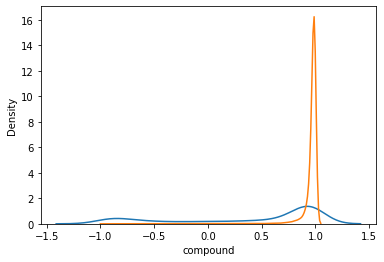

In [ ]:
import seaborn as sns

for x in [-1, 1]:
    subset = dfTc[dfTc['Rating'] == x]

    # Draw the density plot
    if x == 0 or x ==1 :
        label = "Good reviews"
    else:
        label = "Bad reviews"

    sns.distplot(subset['compound'], hist = False, label = label)

In [ ]:
# feature selection
label = "Rating"
ignore_cols = [label, "Review", "Review_clean"]
features = [c for c in dfTc.columns if c not in ignore_cols]

# split the data into train and test
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(dfTc[features], dfTc[label], test_size = 0.20, random_state = 42)

In [ ]:
rf = RandomForestClassifier(n_estimators = 100, random_state = 42)
rf.fit(X_train, y_train)

# show feature importance
feature_importances_df = pd.DataFrame({"feature": features, "importance": rf.feature_importances_}).sort_values("importance", ascending = False)
feature_importances_df.head(20)

,feature,importance
2,pos,0.035972
0,neg,0.035701
3,compound,0.033811
9,doc2vec_vector_3,0.019910
1,neu,0.012692
3068,word_great,0.009810
568,word_bad,0.009540
1995,word_dirty,0.007690
4779,word_ok,0.007290
2459,word_excellent,0.005832


In [ ]:
df3=pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/Data Analyst - Test Data - US_VaderScoresU1.csv')
df3.head()

,date,Location,Review,Language,nb_chars,nb_words,Review_clean,neg,neu,pos,compound,NegRating,PosRating,NeuRating
0,8/20/19,Sebastian,I was very impressed with the resort.\n Great ...,en,169,29,impressed resort.\n great staff main resort po...,0.000,0.462,0.538,0.9325,0,1,1
1,8/20/19,Los Angeles,The rooms were nice the outside needs work als...,en,107,21,room nice outside need work also free breakfas...,0.000,0.419,0.581,0.8779,0,1,1
2,8/20/19,Georgia,Great location! I have stayed at this hotel on...,en,79,16,great location stay hotel last three trip new ...,0.000,0.661,0.339,0.6249,0,0,1
3,8/20/19,NaN,The hotel was adequate for my stay. The strips...,en,420,80,hotel adequate stay strip bathtub useless fell...,0.124,0.716,0.160,0.1779,0,0,1
4,8/19/19,Palm Harbor,"Great location, room was large and spacious. P...",en,99,16,great location room large spacious park easy a...,0.000,0.317,0.683,0.9169,0,1,0


In [ ]:
Negt = dfinal[dfinal['UNegRating'] == 1]
Post = dfinal[dfinal['UPosRating'] == 1]
Neut = dfinal[dfinal['UNeuRating'] == 1]
NEGT = dfinal[dfinal['Unnamed: 15']=="Negative"]
POST = dfinal[dfinal['Unnamed: 15']=="Positive"]

len(Post)


2587

In [ ]:
len(Negt)

848

In [ ]:
len(Neut)

2342

In [ ]:
len(POST)

3695

In [ ]:
Negt.head()

,Unnamed: 0,Unnamed: 0.1,date,Location,Review,Language,nb_chars,nb_words,Review_clean,neg,neu,pos,compound,NegRating,NeuRating,PosRating,Unnamed: 15,UNegRating,UNeuRating,UPosRating
22,22,22,8/18/19,Jacksonville,The room did not seem clean. There was some so...,en,224,42,room not seem clean sort orange sticky glop ba...,0.157,0.735,0.108,-0.0665,1,0,0,Negative,1,0,0
28,28,28,8/17/19,NaN,Rooms very dirty and aged. Breakfast was of po...,en,74,13,room dirty age breakfast poor quality limit choic,0.500,0.500,0.000,-0.7184,1,0,0,Negative,1,0,0
40,40,40,8/14/19,Pennsylvania,This property is advertised as being renovated...,en,419,70,property advertise renovate four floor renovat...,0.241,0.759,0.000,-0.8693,1,0,0,Negative,1,0,0
46,46,46,8/13/19,NaN,"The rooms are terribly small, almost claustrop...",en,115,19,room terribly small almost claustrophobic.\n i...,0.333,0.667,0.000,-0.6124,1,0,0,Negative,1,0,0
47,47,47,8/13/19,Australia,They made us pay for gym facilities we didn’t ...,en,120,26,make pay gym facility didn’t use optional fee ...,0.097,0.903,0.000,-0.1027,1,0,0,Negative,1,0,0


In [ ]:
Neut.mean(axis=0)

Unnamed: 0      2811.297609
Unnamed: 0.1    2811.297609
nb_chars         212.388984
nb_words          39.853117
neg                0.061285
neu                0.695520
pos                0.242766
compound           0.392030
NegRating          0.061059
NeuRating          0.747225
PosRating          0.191716
UNegRating         0.000000
UNeuRating         1.000000
UPosRating         0.000000
dtype: float64

In [ ]:
Neut1=Neut
Neut1['count'] = 1
data_filtered_P = Neut1[['date', 'count']]
data_filtered_P.head(5)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,date,count
2,8/20/19,1
3,8/20/19,1
6,8/19/19,1
9,8/19/19,1
17,8/19/19,1


In [ ]:
df_daily = data_filtered_P.groupby(["date"]).sum().reset_index()
df_daily.head(5)

,date,count
0,1/1/19,13
1,1/10/19,2
2,1/11/19,1
3,1/12/19,3
4,1/13/19,4


In [ ]:
df_dailytop=df_daily[df_daily['count']>17]
df_dailytop

,date,count
126,18-Oct,20
131,19-Jul,21
132,19-Jun,43
134,19-May,43
162,3/1/19,19
304,7/31/19,19


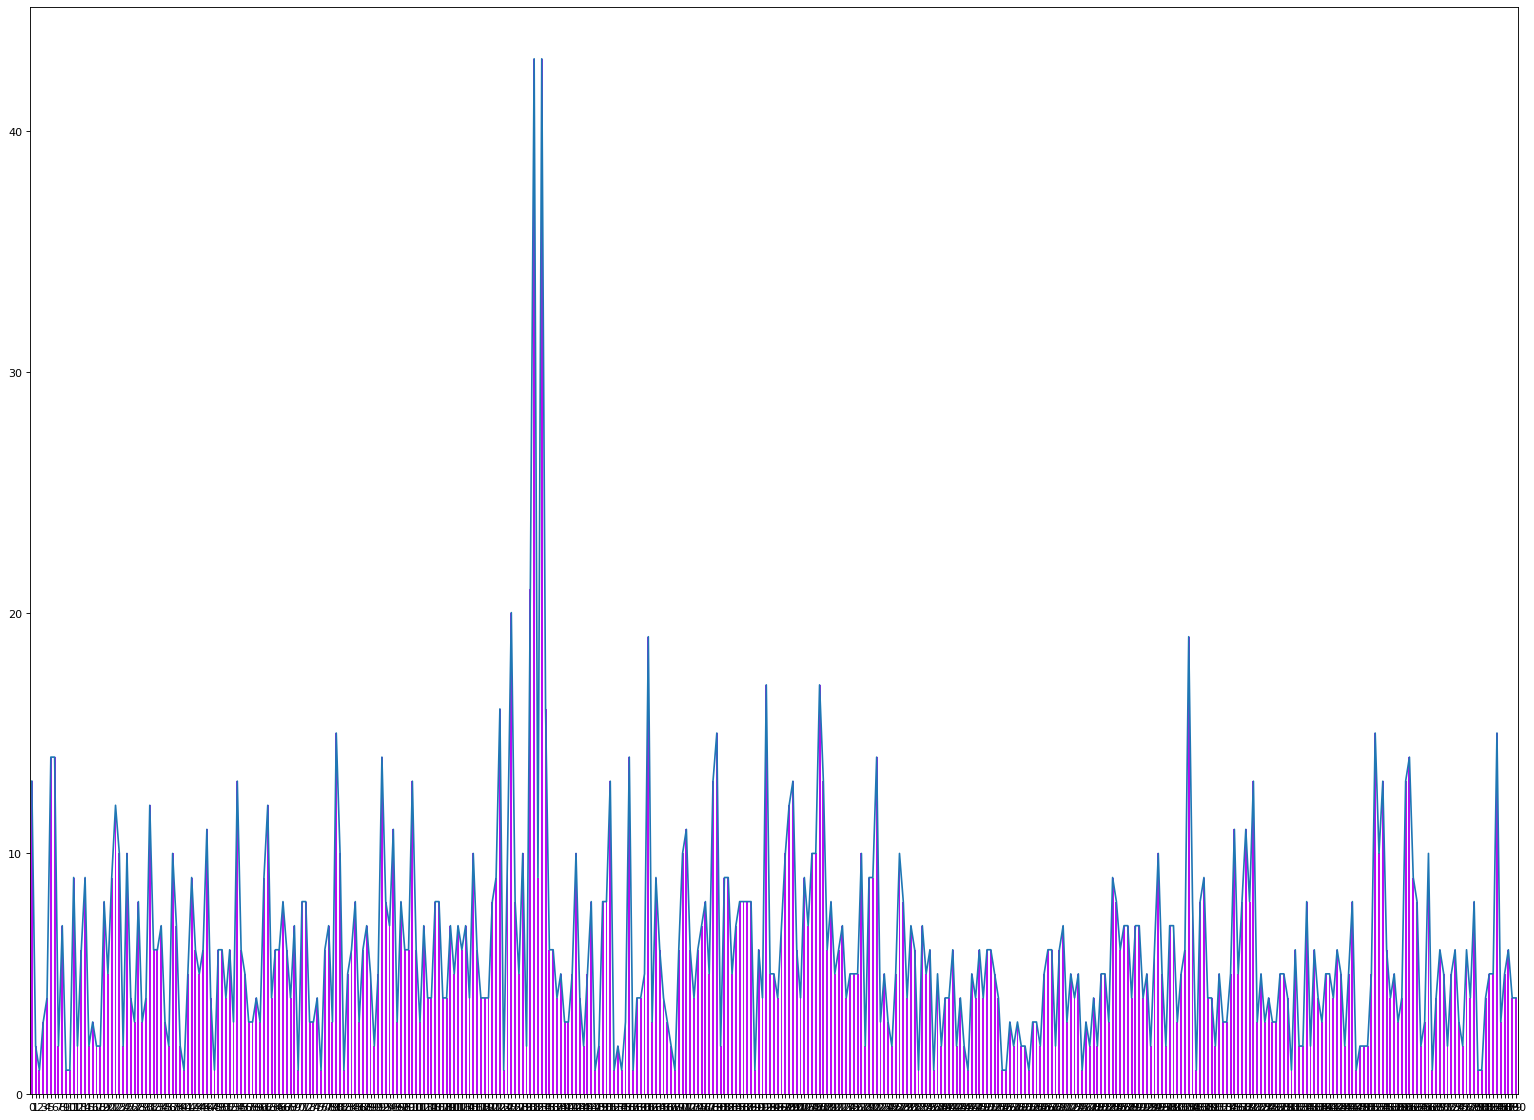

In [ ]:
plt.figure(num=None, figsize=(24, 18), dpi=80, facecolor='w', edgecolor='k')
df_daily["count"].plot.bar(color='#BC0AF3')
df_daily["count"].plot()
plt.show()

In [ ]:
pred_sentences=df2['Review'][11:20]
pred_sentences_1=pred_sentences.tolist()
pred_sentences_1

['Nice and comfortable good position near the station and the subway',
 'Location was great, lobby area was nice but room needs to be upg',
 'Quiet and at a great location. \n Good control at entrance to elevators.',
 'Very nice and quiet and clean rooms. \n We will return when back in the area.',
 'Rooms were clean, updated, and beds were comfortable.',
 'The staff was exceptionally helpful and the property wasclose to dining and shopping ad well as Dineyland. We had a bery restful stay there abd look forward to staying there in the future.',
 'It was great for what we needed, a place to sleep. Parking was 20 a day, which isn’t too bad for that area. We were on the floor that the pool was located on, so there was a constant flow of loud people storming down the hallway. Poorly set up, since that is the only way to the pool. They probably put us there since we used a third party booking site.',
 'rooms were clean. we had two room and were able to get it right across from each other. Lo

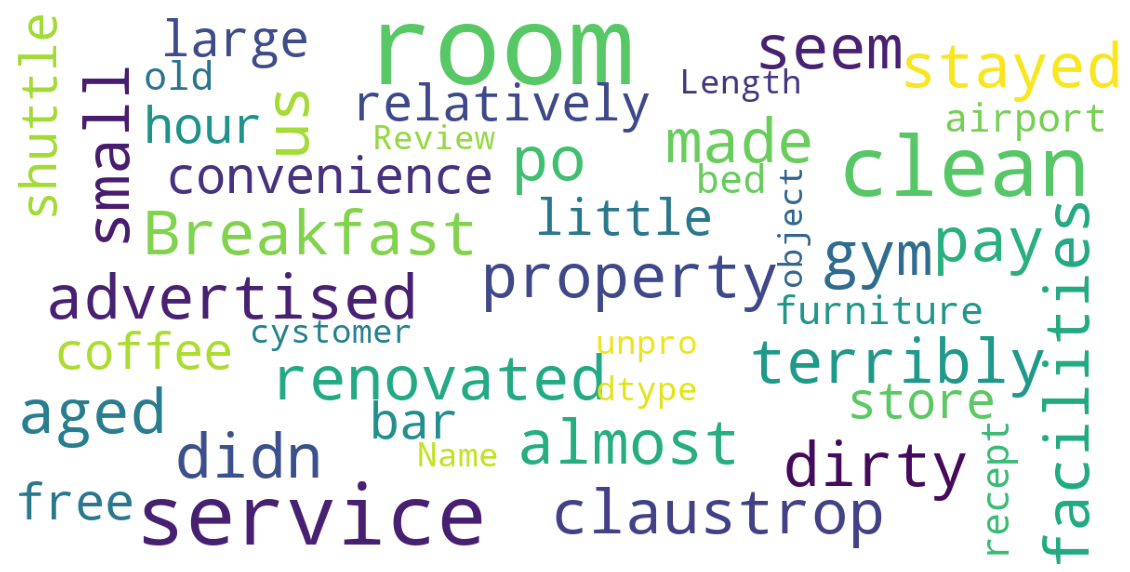

In [ ]:
show_wordcloud(Negt["Review"])

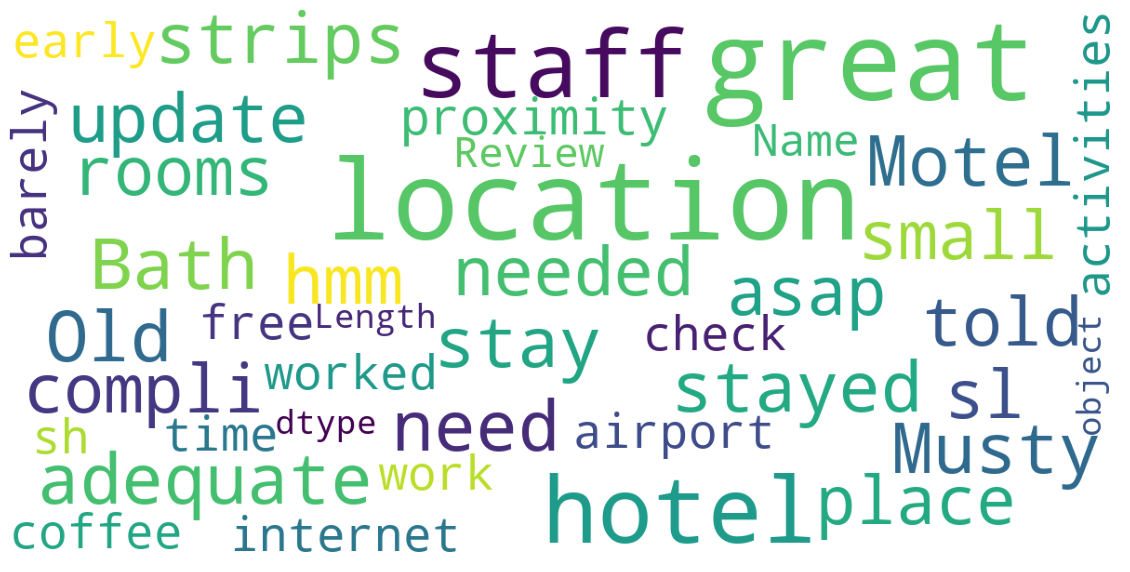

In [ ]:
show_wordcloud(Neut["Review"])